# Stock Panda

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Set panda options
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 10)

In [48]:
# Column constants
INVESTMENT    = 'Investment'
CURRENT_VALUE = 'Cur. val'
PROFIT_LOSS   = 'P&L'
QUANTITY      = 'Qty.'
AVERAGE_COST  = 'Avg. cost'
INSTRUMENT    = 'Instrument'
NET_CHANGE    = 'Net chg.'
DAY_CHANGE    = 'Day chg.'
LTP           = 'LTP'
SECTOR        = 'Sector'
SUB_SECTOR    = 'Sub Sector'

In [49]:
# Parse Zerodha holdings.csv download from the holdings tab
df = pd.read_csv("holdings.csv")

In [50]:
# Enhance with stock definitions like Industry, Midcap/Smallcap/Largecap and others.
df = df.set_index(INSTRUMENT).join(pd.read_csv("stocks.csv").set_index(INSTRUMENT))

In [51]:
# Add Investment column
df[INVESTMENT] = df[QUANTITY] * df[AVERAGE_COST]
df = df.sort_values([INVESTMENT], ascending = False)

# Sector Distribution

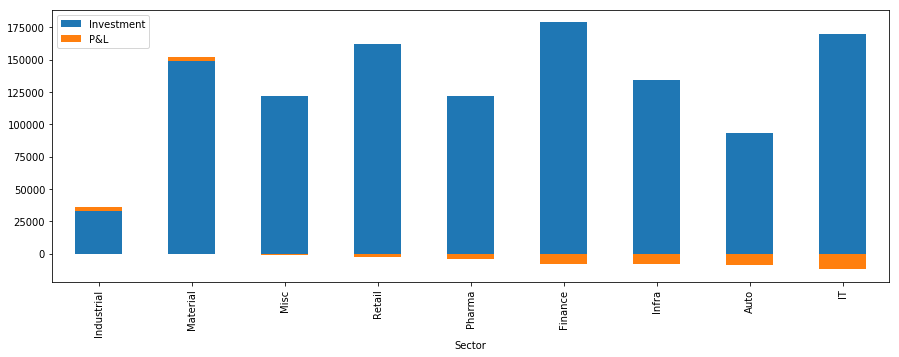

In [53]:
x = df.groupby([SECTOR]).sum()
x = x.sort_values([PROFIT_LOSS], ascending = False)
x = x[[INVESTMENT, PROFIT_LOSS]]
x.plot.bar(
    subplots = False, 
    stacked = True, 
    figsize = (15, 5)
)

# Sub Sector Distribution

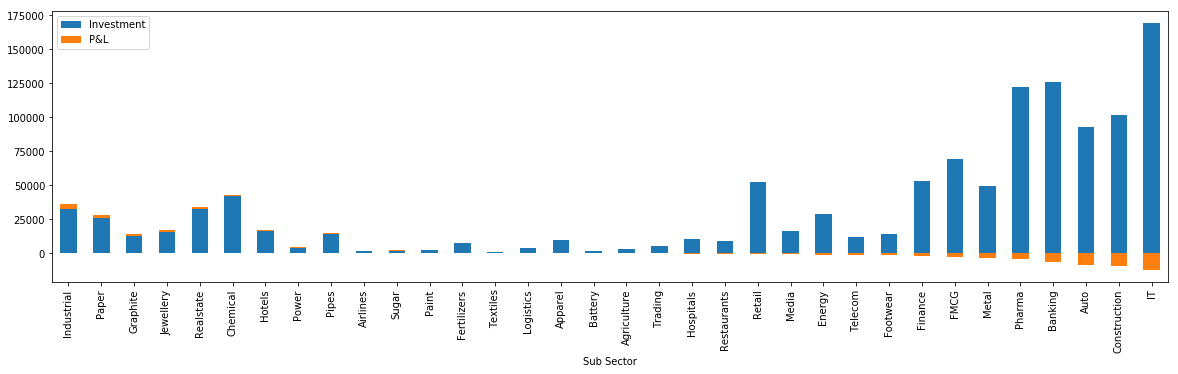

In [54]:
x = df.groupby([SUB_SECTOR]).sum()
x = x.sort_values([PROFIT_LOSS], ascending = False)
x = x[[INVESTMENT, PROFIT_LOSS]]
x.plot.bar(
    subplots = False, 
    stacked = True, 
    figsize = (20, 5)
)

# Top Ten

In [127]:
def heatmap_top_ten(x, col, title):
    labels = np.asarray([
     "{0} \n {1:.1f}".format(symb, value)   
        for symb, value in zip(x.index.values, x[col])
    ]).reshape(2, 5)

    x = np.asarray(x[col]).reshape(2, 5)

    _, ax = plt.subplots(figsize = (15, 3))
    ax.axis('off')
    plt.title(title)
    
    sns.heatmap(x, annot = labels, fmt = "", ax = ax, linewidths = "0.5")

## Profit And Loss

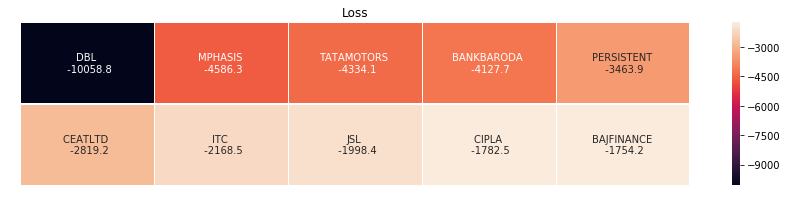

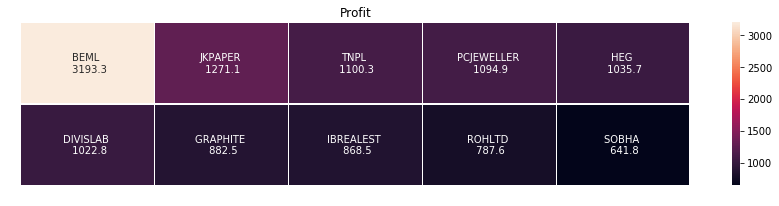

In [149]:
heatmap_top_ten(
    df.sort_values([PROFIT_LOSS]).head(10),
    PROFIT_LOSS,
    "Loss"
)

heatmap_top_ten(
    df.sort_values([PROFIT_LOSS]).tail(10).iloc[::-1],
    PROFIT_LOSS,
    "Profit"
)

## Day Change

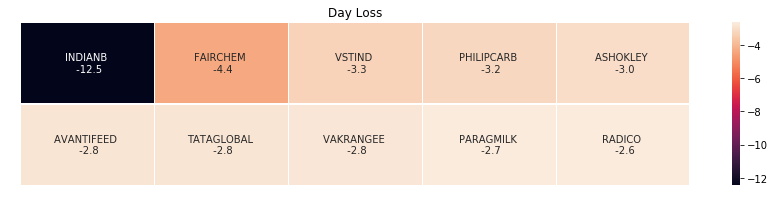

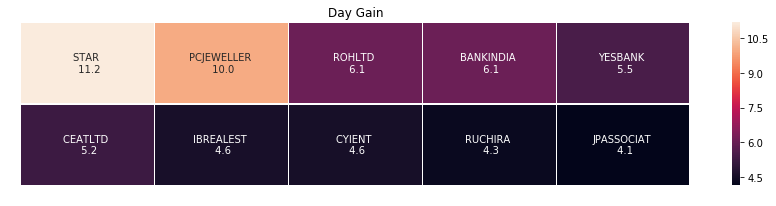

In [130]:
heatmap_top_ten(
    df.sort_values([DAY_CHANGE]).head(10),
    DAY_CHANGE,
    "Day Loss"
)
heatmap_top_ten(
    df.sort_values([DAY_CHANGE]).tail(10).iloc[::-1],
    DAY_CHANGE,
    "Day Gain"
)

In [151]:
df.loc["JSL"]

Qty.               294
Avg. cost        58.25
LTP              51.45
Cur. val       15126.3
P&L            -1998.4
Net chg.        -11.67
Day chg.         -1.44
Sector        Material
Sub Sector       Metal
Investment     17125.5
Name: JSL, dtype: object

# Summary

In [236]:
d[[INVESTMENT, PROFIT_LOSS]].sum().to_frame().style.format("{:,.1f}")

,0
Investment,"1,163,582.4"
P&L,"-38,963.8"


In [113]:
df.loc[df['Type'] ==  'IT']

,Qty.,Avg. cost,LTP,Cur. val,P&L,Net chg.,Day chg.,Type,Investment
Instrument,,,,,,,,,
INFY,33,693.10,657.60,21700.80,-1171.60,-5.12,-0.04,IT,22872.40
MPHASIS,18,1202.79,1065.30,19175.40,-2474.90,-11.43,-0.03,IT,21650.30
TCS,9,1912.28,1843.65,16592.85,-617.70,-3.59,-0.03,IT,17210.55
PERSISTENT,20,731.81,553.65,11073.00,-3563.25,-24.35,-0.51,IT,14636.25
CYIENT,17,692.43,609.60,10363.20,-1408.15,-11.96,-0.34,IT,11771.35
NIITTECH,9,1250.43,1224.60,11021.40,-232.50,-2.07,-0.21,IT,11253.90
FSL,164,66.68,57.70,9462.80,-1472.55,-13.47,-0.35,IT,10935.35
HCLTECH,9,982.65,951.55,8563.95,-279.90,-3.16,-0.13,IT,8843.85
MINDTREE,4,863.09,809.40,3237.60,-214.75,-6.22,-0.14,IT,3452.35


In [103]:
# Print Stocks Sorted by LTP
#df.loc[df['Type'] ==  'IT'].sort_values('LTP', ascending = False)